# Project 2 Tests

In [1]:
# Import libraries
import pandas as pd

## Part 2

In [2]:
# Import py file 
from db_connection import create_connection

In [3]:
# Create database connection using valid vault file
engine = create_connection("vault.txt")

In [18]:
# Verify connection works by querying the account table
pd.read_sql_query("""SELECT * 
                     FROM transaction
                     LIMIT 5""", engine)

,txn_id,txn_date,account_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,1,2000-01-15,1,CDT,100.0,None,None,2000-01-15,T
1,2,2000-01-15,2,CDT,100.0,None,None,2000-01-15,T
2,3,2004-06-30,3,CDT,100.0,None,None,2004-06-30,T
3,4,2001-03-12,4,CDT,100.0,None,None,2001-03-12,T
4,5,2001-03-12,5,CDT,100.0,None,None,2001-03-12,T


In [19]:
# Test error handling by providing an invalid vault filename
engine2 = create_connection("vaults.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'vaults.txt'

## Part 4

In [20]:
# import transactions py file
from transactions import get_transactions_by_month

In [24]:
# Test valid date
get_transactions_by_month(engine, 1, 2000)

,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,2000-01-15,1,CDT,100.0,None,None,2000-01-15,T
1,2000-01-15,2,CDT,100.0,None,None,2000-01-15,T
2,2000-01-15,9,CDT,100.0,None,None,2000-01-15,T


In [25]:
# Test valid date 
get_transactions_by_month(engine, 1, 2004)

,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,2004-01-27,11,CDT,100.0,None,None,2004-01-27,T
1,2004-01-12,14,CDT,100.0,None,None,2004-01-12,T


In [26]:
# Test invalid date 
get_transactions_by_month(engine, 13, 2000)

Invalid month or year


,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,-1,-1,-1,-1,-1,-1,-1,-1


In [27]:
# Test invalid date 
get_transactions_by_month(engine, 12, 1700)

Invalid month or year


,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,-1,-1,-1,-1,-1,-1,-1,-1


## Part 6

In [29]:
# import transactions py file
from bank_client import BankTransactions


In [30]:
# Create an instance of the class
bank = BankTransactions("vault.txt")

In [33]:
# Test get_transactions
bank.get_transactions(1, 2000)

,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,2000-01-15,1,CDT,100.0,None,None,2000-01-15,T
1,2000-01-15,2,CDT,100.0,None,None,2000-01-15,T
2,2000-01-15,9,CDT,100.0,None,None,2000-01-15,T


In [32]:
# Test get_transactions
bank.get_transactions(13, 2000)

Invalid month or year


,txn_date,txn_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,-1,-1,-1,-1,-1,-1,-1,-1


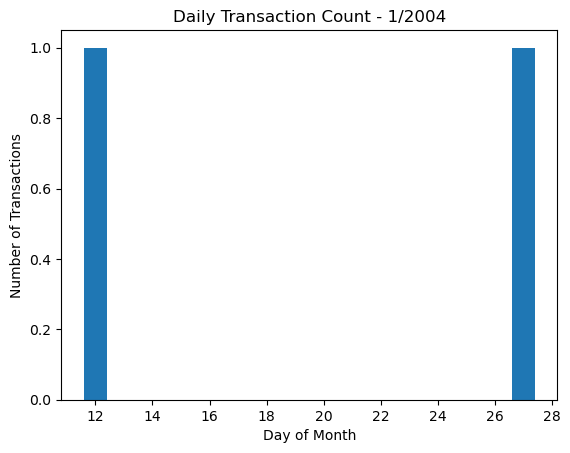

In [35]:
# Test plot_transactions_by_day
bank.plot_transactions_by_day(1, 2004)

In [36]:
# Test plot_transactions_by_day with empty data set
bank.plot_transactions_by_day(10, 2000)

Cannot plot: no transactions found for that month/year.


In [37]:
# Test plot_transactions_by_day with invalid date
bank.plot_transactions_by_day(13, 1700)

Invalid month or year
Cannot plot: invalid month/year input.
